# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

To find potential factors in vaccine hesistancy in the COVID-19 pandemic, we used a dataset of characteristics of people who either got the H1N1 or didn't. We tested different machine learning models on the dataset for prediction accuracy and ended up choosing a ____ model.  

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

The CDC has hired us as data scientists to find lessons from the H1N1 pandemic. Early into the vaccine rollout, there has been massive public skepticism of the vaccine, slowing our ability to overcome the virus and re-open the country.

We have received a large dataset from 2009, with statistical information and pandemic/H1N1 scaled opinions for each respondent. This data includes whether each person was vaccinated or not, which will allow us to predict who gets the vaccine.

This model will allow the CDC to determine investments in public health awaareness, surveying and modelling during the pandemic, based on the parameters which impact an individuals vaccine choice the most.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?
- What exactly is your deliverable: your analysis, or the model itself?
- Does your business understanding/stakeholder require a specific type of model?
    - For example: a highly regulated industry would require a very transparent/simple/interpretable model, whereas a situation where the model itself is your deliverable would likely benefit from a more complex and thus stronger model
   

Additional questions to consider for classification:

- What does a false positive look like in this context?
- What does a false negative look like in this context?
- Which is worse for your stakeholder?
- What metric are you focusing on optimizing, given the answers to the above questions?

## Data Understanding

The dataset includes 26,000 respondents responses, and includes 34 different characteristics. They provide demographic information such as age, sex, race, income, and education and also include opinion and knowledge assessment on the risk of the H1N1 virus. 


The target variable is the 'h1n1 vaccine' column. It is binary: 0 means the respondent didn't get the vaccine and 1 means they did. 

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [77]:
# code here to explore your data

import pandas as pd

data = pd.read_csv('../Data/training_set_features.csv', index_col='respondent_id')
target = pd.read_csv('../Data/training_set_labels.csv', index_col='respondent_id')
holdout_set = pd.read_csv('../Data/test_set_features.csv', index_col='respondent_id')


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53414 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  opinion_h1n1_vac

In [119]:
# lets see what features are the most important for our prediction. 



AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

<Figure size 576x576 with 0 Axes>

## Data Preparation

Describe and justify the process for preparing the data for analysis.

As the dataset also includes information on whether the respondent got the seasonal flu vaccine and their scaled opinions on the seasonal vaccine, we decided to drop all data and focus on h1n1-related data for model simplicity.

We then decided to drop the health insurance column as there were many null values, and in initial data modelling our model was much more accurate with it gone.

The data left is a combination of ordinal (>2 non-continuous) and binary variables, both in string and number format. We converted all string data to integers, i.e. 'Male' and 'Female' in the 'sex' column converted to 0 and 1, respectively.

For remaining missing values in columns, we filled in the mode of the dataset. 

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

Text(0, 0.5, 'h1n1_vaccine')

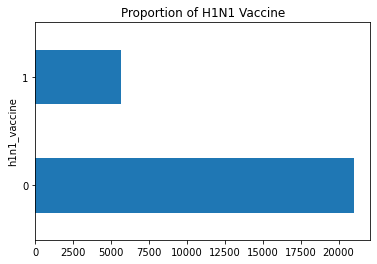

In [78]:
# Dropping all columns that are related to the seasonal flue target
data.drop(columns=[
    'hhs_geo_region',
    'census_msa', 
    'employment_industry', 
    'employment_occupation', 
    'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc', 
    'health_insurance', 
    'doctor_recc_seasonal'], inplace=True)

# We only need the 'h1n1_vaccine' column as our target variable so we'll turn it into a panda series with just that column. 
target = pd.Series(target['h1n1_vaccine'])

# Visualize the target variable
fig, ax = plt.subplots()
target.value_counts().plot.barh(title="Proportion of H1N1 Vaccine", ax=ax)
ax.set_ylabel("h1n1_vaccine")



In [87]:

# inspect the values 
target.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

## Modeling

We set up a Machine learning Pipeline using SkLearn in order to easily run different models without changing too much code. 

The first step in the Pipeline is the Preprossessing stage when we convert categorical data into none ordinal numbers and we will also scale the numeric columns. The preprosessing step also deals with missing values. 










############
Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [110]:
# code inspired from https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

# create lists containing names of related columns for transformation 

num_cols = data.select_dtypes('number').columns

ord_cols = ['age_group', 'education',  'income_poverty', 'employment_status']

cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own'] 


# import neccessary libararies 


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, num_cols), 
        ('cat', cat_transformer, cat_cols)], remainder = "drop")


# The Next step in the Pipeline is the prediction. We will use a Logistic Regression model to predict weather someone will get the H1N1 vaccine or not

from sklearn.linear_model import LogisticRegression

log_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
        ("classifier", LogisticRegression())])




log_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__numeric', 'preprocessor__cat', 'preprocessor__numeric__memory', 'preprocessor__numeric__steps', 'preprocessor__numeric__verbose', 'preprocessor__numeric__standard_scaler', 'preprocessor__numeric__simple_imputer', 'preprocessor__numeric__standard_scaler__copy', 'preprocessor__numeric__standard_scaler__with_mean', 'preprocessor__numeric__standard_scaler__with_std', 'preprocessor__numeric__simple_imputer__add_indicator', 'preprocessor__numeric__simple_imputer__copy', 'preprocessor__numeric__simple_imputer__fill_value', 'preprocessor__numeric__simple_imputer__missing_values', 'preprocessor__numeric__simple_imputer__strategy', 'preprocessor__numeric__simple_imputer__verbose', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 

# because this Pipeline has alot of hyperparamters we can tweak to try to get a better model we'll set up a Gridsearch to find the best parametrics that results in the best score.

In [111]:
# inprired by the code found at  https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb
log_param = {
        'classifier__penalty': ['l1', 'l2', 'elasticnet', None],                        # Method on how to deal with features with high Coefficient. 
        'classifier__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10],  # Setting regularization strength. 
        'classifier__max_iter': [25, 50, 75, 100, 125, 150],                            # Sets maximum number of itereations taken for solver to converge.
        'classifier__multi_class': ['auto', 'ovr', 'multinomial'],                      # Sets how to define target class
        'classifier__solver': ['lbfgs, ‘liblinear', 'sag', 'saga'],                     # Algorithm to use in the optimization problem
        'classifier__class_weight': ['balanced'], 
        'classifier__random_state': [42]                                       # sets weights
}



# we will now perform a train test split to make a terst set to run through the models

from sklearn.model_selection import train_test_split

X_train, X_true, y_train, y_true = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=42)

from sklearn.model_selection import GridSearchCV


# Initialize a Grid_Search object and pass thru the pipeline we set up and adjust the params we declared to be tweaked 
grid_search = GridSearchCV(estimator=log_pipeline, param_grid=log_param, cv=10, verbose=3,n_jobs=-1)
# fit the grid_search model with the training data set
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'b...
             param_grid={'classifier__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1],
     

In [112]:
grid_search.best_params_

{'classifier__C': 0.01,
 'classifier__class_weight': 'balanced',
 'classifier__max_iter': 25,
 'classifier__multi_class': 'auto',
 'classifier__penalty': 'l1',
 'classifier__random_state': 42,
 'classifier__solver': 'saga'}

## Evaluation

With Grid Search we can easily get a configuration for the best Parametrics to use on our model. 






////////////////////////////////////

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

From a baseline understanding, the data set target is skewed towards those who didn't get the vaccine, 79% of respondents. 

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

We examined how accurately a decision tree-based model would be able to determine if someone got vaccinated or not based on their characteristics. 

In this case we dropped rows with missing values and used pd.get_dummies to split up the ordinal variables with 3 or more values.

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [82]:
# code here to iteratively improve your models

In [83]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [84]:
# code here to show your final model

In [85]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
